In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family='MalGun Gothic')
mpl.rc('axes',unicode_minus = False)

# 범주형 변수를 처리하는 방법

* 원핫 인코딩 이용하기

In [9]:
import mglearn
import os

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"adult.data"),
                  names=['age','workclass','fnlwgt','education','education-num',
                        'marital-status',' occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country','income']) # 경로를 연결하여 하나의 경로로 지정한다.
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# 범주형 확인해보기
data.info()

##########################
# workclass, education, marital-status, occupation, race, relationship, gender, native-country이 범주형인것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
 occupation       32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
# get_dummies 함수를 사용해 데이터 인코딩 해보기
print('원본 특성 : \n',data.columns)
print('특성의 개수 : ',data.shape[1])

data_dummies = pd.get_dummies(data)

print('인코딩 후 특성 : \n',data_dummies.columns)
print('특성의 개수 : ',data_dummies.shape[1])

#########################3
# 인코딩 후 특성의 개수가 15개에서 110개로 늘어난 것을 확인할 수 있다.

원본 특성 : 
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', ' occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
특성의 개수 :  15
인코딩 후 특성 : 
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)
특성의 개수 :  110


In [36]:
# 로지스틱회귀,knn과 원핫인코딩 이용하기!!
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# data의 범주형 변수를 이진 특성값으로 바꾼다.
data_dummies = pd.get_dummies(data)

# 설명변수와 반응변수 나누기
X = data_dummies.loc[:,'age':'native-country_ Yugoslavia'] 
y = data_dummies['income_ >50K'] # income >50k를 반응변수로 설정했다.


# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 로지스틱 회귀 모델 생성 및 학습
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)

# knn 생성 및 학습
knn  = KNeighborsClassifier() # n_neighbors의 default값은 5이다.
knn.fit(X_train,y_train)

# 점수 확인하기
print('테스트 점수 : {:.3f}'.format(lr.score(X_test,y_test)))
print('테스트 점수 : {:.3f}'.format(knn.score(X_test,y_test)))
    
#############################
# pd.get_dummies()함수를 사용할 때는 데이터를 나누기 전에 사용해야 한다.
# 이 데이터는 로지스틱회귀 모델에서 좀 더 성능이 좋다는 것을 알 수 있다.

테스트 점수 : 0.796
테스트 점수 : 0.769


In [51]:
# 숫자로 표현된 범주형 변수를 이진특성값으로 변환하기
ex = pd.DataFrame({'숫자 특성' : [0,1,2,1], '범주형 특성' : ['양말','여우','양말','상자']}) # 딕셔너리 형태를 데이터 프레임으로 변경

# 이때 숫자 특성은 범주의 성격을 가진다.
# 숫자로 표현된 범주형을 이진특성값으로 변환하기 위해서는 숫자 특성값들이 문자형으로 인식되어야 한다.

# 숫자 특성을 문자형으로 변환하기
ex['숫자 특성'] = ex['숫자 특성'].astype(str)
ex.info()  # 문자형으로 바뀐것을 확인할 수 있다.

# pd._get_dummies 이용하기
pd.get_dummies(ex)

########################################
# 숫자 범주형을 인코딩하기 위해서는 범주형의 값들이 문자형으로 인식되어야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
숫자 특성     4 non-null object
범주형 특성    4 non-null object
dtypes: object(2)
memory usage: 192.0+ bytes


,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [80]:
# OneHotEncoder를 이용해 인코딩을 수행하기
from sklearn.preprocessing import OneHotEncoder

# 객체 생성 및 학습,변환
one = OneHotEncoder(sparse=False) # sparse = False로 지정하면 넘파일 배열을 반환한다.
print(one.fit_transform(data.loc[:,'age':'workclass'])) 
print(one.get_feature_names())

##########################################
# OneHotEndoer와 pd.get_dummies 를 비교해봐야 된다.
# pd.get_dummies의 경우는 문자형 특성에 관해서만 인코딩을 수행한다.
# OneHotEncoder의 경우는 모든 특성에 관해 인코딩을 수행한다.

# OneHotEncoder의 경우는 모든 특성에 관해 인코딩을 수행하기 때문에 원하는 특성들만 인코딩을 하고 싶을 때는 손쉽게 변환하지 못하는 문제가 생긴다.
# 따라서, ColumnTransformer 객체를 사용해 위의 문제를 해결할 수 있다.

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['x0_17' 'x0_18' 'x0_19' 'x0_20' 'x0_21' 'x0_22' 'x0_23' 'x0_24' 'x0_25'
 'x0_26' 'x0_27' 'x0_28' 'x0_29' 'x0_30' 'x0_31' 'x0_32' 'x0_33' 'x0_34'
 'x0_35' 'x0_36' 'x0_37' 'x0_38' 'x0_39' 'x0_40' 'x0_41' 'x0_42' 'x0_43'
 'x0_44' 'x0_45' 'x0_46' 'x0_47' 'x0_48' 'x0_49' 'x0_50' 'x0_51' 'x0_52'
 'x0_53' 'x0_54' 'x0_55' 'x0_56' 'x0_57' 'x0_58' 'x0_59' 'x0_60' 'x0_61'
 'x0_62' 'x0_63' 'x0_64' 'x0_65' 'x0_66' 'x0_67' 'x0_68' 'x0_69' 'x0_70'
 'x0_71' 'x0_72' 'x0_73' 'x0_74' 'x0_75' 'x0_76' 'x0_77' 'x0_78' 'x0_79'
 'x0_80' 'x0_81' 'x0_82' 'x0_83' 'x0_84' 'x0_85' 'x0_86' 'x0_87' 'x0_88'
 'x0_90' 'x1_ ?' 'x1_ Federal-gov' 'x1_ Local-gov' 'x1_ Never-worked'
 'x1_ Private' 'x1_ Self-emp-inc' 'x1_ Self-emp-not-inc' 'x1_ State-gov'
 'x1_ Without-pay']


In [88]:
# ColumnTransformer 사용하기  --> data 사용하기
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 객체 생성하기 --> age,hours-per-week 특성에는 정규화스케일링을 하고 'workclass','education','gender','occupation'에는 인코딩을 한다.
ct = ColumnTransformer([
    ('scaling',StandardScaler(), ['age','hours-per-week']),
    ('onehot',OneHotEncoder(sparse=False),['workclass','education','gender',' occupation'])
])

# 설명변수와 반응변수 지정하기
X = data.drop('income',axis=1)
y = data['income']

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 앞에서 만든 객체 학습하고 변환하기
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

# 모델 생성 및 학습
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(X_train_trans,y_train)

# 평가하기
print('테스트 점수 : {:.3f}'.format(lr.score(X_test_trans,y_test)))

#########################
# 위와 같이 ColumnTransformer는 원하는 특성에 원하는 변환을 할 수 있게 도와준다.
# ColumnTransformer는 각 단계 이름을 지정해야하므로 make_column_transfomer를 이용해 더 간단히 활용할 수 있다.

테스트 점수 : 0.809


In [90]:
#  make_column_transfomer를 사용하기  
from sklearn.compose import make_column_transformer

ct = make_column_transformer([
(['age','hours-per-week'],StandardScaler()),
(['workclass','education','gender',' occupation'],OneHotEncoder(sparse=False))
])

###################
# make_column_transformer를 이용하면 각 단계마다 이름을 지정할 필요 없이 이용할 모델만 사용할 수 있다.

# 구간분할

* wave 데이터를 사용하여 선형모형과 결정트리를 구간분할 했을 때의 차이를 분석

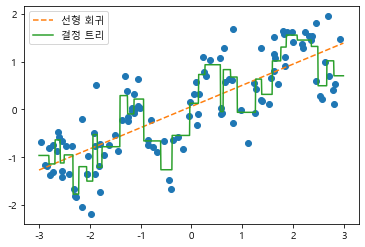

linear score : 0.626
decision tree score : 0.856


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 데이터 생성
X,y = mglearn.datasets.make_wave(n_samples=120)

# 라인 지정하기
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1) # 배열의 크기 변형

# 모델 생성하기
reg = LinearRegression().fit(X,y)
tree = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)

# 그림 그리기
plt.plot(X,y,'o') # 실제값 산점도 그리기
plt.plot(line,reg.predict(line),'--',label='선형 회귀')
plt.plot(line,tree.predict(line),label='결정 트리')
plt.legend(loc='best') # 범례 표시
plt.show()

# 점수 확인해보기
print('linear score : {:.3f}'.format(reg.score(X,y)))
print('decision tree score : {:.3f}'.format(tree.score(X,y)))

#####################
# 실제값과 각 모델의 예측값들을 비교해보면 결정트리의 구분선이 실제값과 더 근접하다고 볼 수 있다.
# 각 모델의 점수를 비교해 보았을 때도 결정트리가 선형회귀보다 더 좋은 성능을 보이고 있다.

In [129]:
# 구간 분할하기
from sklearn.preprocessing import KBinsDiscretizer

# 객체 생성 및 학습
kb = KBinsDiscretizer(n_bins=10,strategy='uniform') # 구간을 10개로 나누고 균일분포를 이용한다.
kb.fit(X)

# 분할한 구간 확인해보기
print('분할된 구간 : \n', kb.bin_edges_)

# 인코딩 적용하가
X_trans = kb.transform(X)
print('변환된 데이터 크기 : ',X_trans.toarray().shape)
print('원본 데이터 크기 : ',X.shape)

# 원본 데이터와 변환된 데이터 확인해보기
print(X[:10])
X_trans.toarray()[:10]

#############################################
# KBinsDiscretizer은 구간을 지정한 크기만큼 분할하고 원핫 인코더를 수행한다.
# 분할된 구간을 구분 기준으로 잡고 실제 X값들이 기준 안에 들어가면 1, 들어가지 않으면 0을 출력한다.

분할된 구간 : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]
변환된 데이터 크기 :  (120, 10)
원본 데이터 크기 :  (120, 1)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

linear score : 0.724
decision tree score : 0.724


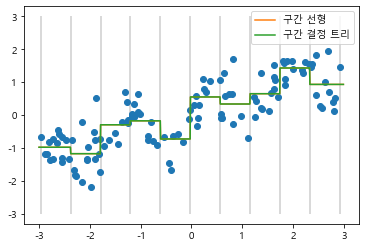

In [135]:
# 그림으로 표현해보기

# 라인 지정하기
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1) # 배열의 크기 변형

# 모델 생성 및 학습, 변환
kb = KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_trans = kb.transform(X)

reg = LinearRegression().fit(X_trans,y)
tree = DecisionTreeRegressor(min_samples_leaf=3).fit(X_trans,y)

# 그래프 그리기
line_binned  = kb.transform(line)
plt.plot(X,y,'o')
plt.plot(line,reg.predict(line_binned),label='구간 선형')
plt.plot(line,tree.predict(line_binned),label='구간 결정 트리')
plt.vlines(kb.bin_edges_[0],-3,3,alpha=.2) # 구간 선 그리기
plt.legend()

# 점수 확인해보기
print('linear score : {:.3f}'.format(reg.score(X_trans,y)))
print('decision tree score : {:.3f}'.format(tree.score(X_trans,y)))

###########################
# 구간을 분할한 뒤 각 모델을 비교하면 두 모델의 예측값이 서로 같다는 사실을 확인할 수 있다.
# 각 모델에 대한 점수도 동일한 것을 확인할 수 있다.
# 앞에서 분할하지 않았을 때와 비교해보면 결정트리는 분할하는 것에 크게 영향을 받지 않는 것 같다.

# 상호작용과 다항식

* 특성이 적을 때 상호작용과 다항식을 추가할 수 있다.
* 구간특성과 원본 특성의 곱을 이용하거나 각 특성의 제곱을 새로운 특성으로 추가하는 방법 등이 있다.

In [146]:
# 원본 특성과 구간 분할 특성을 합친다. -> 기울기를 특성으로 추가한다.
X_combined = np.hstack([X,X_trans]) # hstack은 각 배열을 오른쪽으로 이어붙힌다.

# 크기와 결과 확인하기
print('특성 추가 후 데이터 크기 : ',X_combined.shape,'\n')
print(X_combined[:3],'\n')

# 상호작용 특성을 추가한다. --> 구간 특성과 원본 특성의 곱을 이용한다.
X_product = np.hstack([X_trans,X*X_trans])

# 크기와 결과 확인하기
print('특성 추가 후 데이터 크기 : ',X_product.shape,'\n')
print(X_product[:3])

#################################
# 기울기 특성을 추가했을 때는 특성이 원본의 특성을 포함해 11개가 되고, 상호작용 특성을 추가하면 20개가 되는 것을 볼 수 있다.
# 구간특성과 원본 특성의 곱은 구간특성에성= 1인 부분의 위치를 원본 특성의 값이 들어가게 되면서 원본과 구간특성의 상호작용을 적용해준다.

특성 추가 후 데이터 크기 :  (120, 11) 

[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]] 

특성 추가 후 데이터 크기 :  (120, 20) 

[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.     

In [180]:
# 다항식 추가하기
from sklearn.preprocessing import PolynomialFeatures

# 객체 생성 및 학습하기
poly = PolynomialFeatures(degree=10,include_bias=False) # 차원을 10차원으로 바꾼다.
poly.fit(X)

# 변환하기
X_poly = poly.transform(X)

# 변환 후 데이터 크기 확인
print('데이터 크기 : ',X_poly.shape)

# 원본 데이터와 변환 데이터 확인하기
print('원본 데이터 : \n',X[:5])
print('변환 데이터 : \n',X_poly[:5])

print('특성 이름 : ',poly.get_feature_names())
###############################
# 원본 데이터의 값에 거듭제곱을 하여 새로운 특성을 추가시켜 차원을 높이고 있다.

데이터 크기 :  (120, 10)
원본 데이터 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
변환 데이터 : 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
특성 이름 :  ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5'

gamma가 1일때 svr 점수 : 0.754
gamma가 10일때 svr 점수 : 0.787
선형회귀 모델의 점수 : 0.735


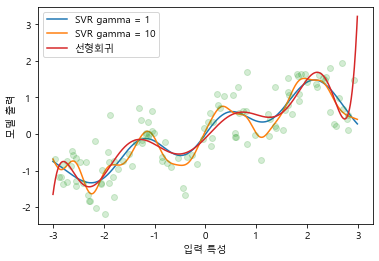

In [185]:
# 선형회귀 모델과 svr 모델 적용해보기
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# 모델 생성 및 학습
reg = LinearRegression().fit(X_poly,y)  # 다항식으로 변환한 X 적용

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y) # 다항식을 추가하지는 않았지만, 커널트릭을 이용해 다항식을 추가한 결과가 같게 나온다.
    
    # gamma에 따른 모델 시각화 하기
    plt.plot(line,svr.predict(line),label='SVR gamma = {}'.format(gamma)) # gamma에 따른 모델 시각화
    
    # 평가점수 확인하기
    print('gamma가 {}일때 svr 점수 : {:.3f}'.format(gamma,svr.score(X,y)))
    
    
# 평가 점수 확인하기
print('선형회귀 모델의 점수 : {:.3f}'.format(reg.score(X_poly,y)))


# 그래프 시각화
line_poly = poly.transform(line)

plt.plot(X,y,'o',alpha=.2) # 실제값 산점도
plt.plot(line,reg.predict(line_poly),label='선형회귀') # 선형회귀 모델 시각화
plt.legend()
plt.xlabel('입력 특성')
plt.ylabel('모델 출력')
plt.show()

#############################
# 선형회귀 모데과 svr모델의 성능이 거의 비슷하다는 것을 확인할 수 있다.
# 또한, gamma가 커졌을 때 즉, 폭이 좁아졌을 때 모델 성능이 좀 더 좋아지는 것을 볼 수 있다.

In [186]:
# 보스톤 주택 가격 데이터를 이용해 다항식 특성을 적용해보기
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# 데이터 불러오기
boston = load_boston()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

# 차수가 2인 다항식 특성을 추가하기
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_trans)

X_train_poly = poly.transform(X_train_trans)
X_test_poly = poly.transform(X_test_trans)

# ridge와 randomforest 모델 사용하기
ridge = Ridge().fit(X_train_trans,y_train) # 특성 추가를 하지 않은 모델
ridge_poly = Ridge().fit(X_train_poly,y_train) # 특성 추가를 한 모델

rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_trans,y_train)
rf_poly = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_poly,y_train)

# 평가 점수 확인하기
print('ridge 특성 추가 안했을 때 점수 : {:.3f}'.format(ridge.score(X_test_trans,y_test)))
print('ridge 특성 추가 했을 때 점수 : {:.3f}'.format(ridge_poly.score(X_test_poly,y_test)))

print('random forest 특성 추가 안했을 때 점수 : {:.3f}'.format(rf.score(X_test_trans,y_test)))
print('random forest 특성 추가 했을 때 점수 : {:.3f}'.format(rf_poly.score(X_test_poly,y_test)))

#########################
# 결과를 확인해보면 random forest의 경우는 특성을 추가했을 때와 하지 않았을 때의 차이가 많이 나지 않는다.
# 선형회귀 모델 중 하나인 ridge 모델의 경우는 특성을 추가했을 때 하지 않았을 때보다 모델 성능이 더 좋아진 것을 확인 할 수 있다.

ridge 특성 추가 안했을 때 점수 : 0.621
ridge 특성 추가 했을 때 점수 : 0.753
random forest 특성 추가 안했을 때 점수 : 0.795
random forest 특성 추가 했을 때 점수 : 0.774


# 일변량 비선형 변환

* 비선형성이 있는 경우에 log나 exp를 이용해 데이터의 스케일을 바꾸어 줄 수 있다.
* 모델은 각 특성이 정규분포와 비슷할 때 좋은 성능을 낸다.

[ 56  81  25  20  27  18  12  21 109   7]
출현 횟수 : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


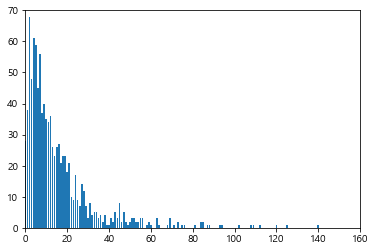

In [197]:
# 데이터 생성
rnd = np.random.RandomState(0) #시드값 지정
X_original = rnd.normal(size=(1000,3)) # 1000*3 행렬 생성
w = rnd.normal(size=3)

# exp를 이용해 데이터 변환하기
X = rnd.poisson(10*np.exp(X_original))
y = np.dot(X_original,w) # 두 행렬을 곱하기

# 데이터 확인하기
print(X[:10,0])

# 특성 출현 횟수 파악하기
print('출현 횟수 : \n',np.bincount(X[:,0]))

# 시각화 해보기
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins) # 막대 그림 그리기
plt.show()

################################
# 2의 빈도수가 가장 높게 나타난다.
# 한쪽으로 치우쳐져 있는 분포를 보여준다. -> 선형 모델에 잘 맞지 않는다.

log 스케일 하기 전 점수 : 0.622
log 스케일 한 후 점수 : 0.875


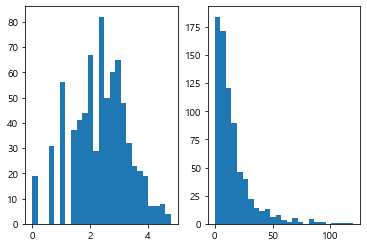

In [208]:
# 위 데이터에 ridge 모델 사용하기

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 로그 스케일링 하기
X_train_log = np.log(X_train + 1) # log 0은 오류가 발생하기 때문에 1을 더해준다.
X_test_log = np.log(X_test + 1)

# 모델 생성 및 학습
ridge = Ridge().fit(X_train,y_train) # 로그 스케일링을 하지 않은 모델
ridge_log = Ridge().fit(X_train_log,y_train) # 로그 스케일링을 한 모델

# 평가 점수 확인하기
print('log 스케일 하기 전 점수 : {:.3f}'.format(ridge.score(X_test,y_test)))
print('log 스케일 한 후 점수 : {:.3f}'.format(ridge_log.score(X_test_log,y_test)))

# 시각화 하기
plt.subplot(121)
plt.hist(X_train_log[:,0],bins=25) # 로그 스케일 한 그래프
plt.subplot(122)
plt.hist(X_train[:,0],bins=25) # 로그 스케일 하지 않은 그래프
plt.show()

################################
# 결과를 확인해보면 log 스케일링을 하면 정규분포에 좀 더 근사해지는 것을 확인할 수 있다.
# 또한, 평가 점수를 확인해 보았을 때도 log스케일한 점수가 하기 전 점수보다 더 높다는 것을 알 수 있다.

# 특성 자동 선택

* 특성의 수가 많아지면 모델이 복잡해지고 과대적합되기 쉬워진다.
* 이에 중요한 특성만을 뽑아 모델에 적용해야 된다.

* 어떤 특성이 좋은지 알 수 있는 방법
1. 일변량 통계
2. 모델 기반 선택
3. 반복적 선택

* 일변량 통계
* 분산분석을 이용하여 특성을 분류한다.
* percnetile를 지정하여 특성 선택의 비율을 설정할 수 있다.

In [219]:
# cancer data를 이용해서 특성추출하기
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
cancer = load_breast_cancer()

# 노이즈 데이터 생성하기
rnd = np.random.RandomState(0) #시드값 지정
noise = rnd.normal(size=(len(cancer.data),50))

# 특성에 노이즈 데이터 추가하기
X_noise = np.hstack([cancer.data,noise])

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X_noise,cancer.target,random_state=42)

# 특성 추출하기 위한 객체 생성 및 학습
select = SelectPercentile(score_func=f_classif, percentile=50) # f_classif를 이용하고 특성 50%를 추출한다.
select.fit(X_train,y_train)

# 특성추출하기
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)

# 특성의 변화과정 살펴보기
print('노이즈 추가 후 훈련 데이터 크기 : ',X_train.shape)
print('특성 추출 후 훈련 데이터 크기 : ',X_train_select.shape)

# 로지스틱 회귀 모델 사용하기
lr = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train,y_train)
lr_select = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train_select,y_train)

# 평가 점수 확인하기
print('노이즈 추가 후 테스트 점수 : {:.3f}'.format(lr.score(X_test,y_test)))
print('특성 추출 후 테스트 점수 : {:.3f}'.format(lr_select.score(X_test_select,y_test)))

#################################
# 특성 추출 후 데이터 크기를 보면 80개에서 40개로 감소한 것을 볼 수 있다.
# 특성 추출 후 테스트 점수와 특성 추출 전 테스트 점수를 비교해보면 특성을 추출 여부는 모델 성능에 큰 영향을 미치지 않는 것을 볼 수 있다.

노이즈 추가 후 훈련 데이터 크기 :  (426, 80)
특성 추출 후 훈련 데이터 크기 :  (426, 40)
노이즈 추가 후 테스트 점수 : 0.958
특성 추출 후 테스트 점수 : 0.951


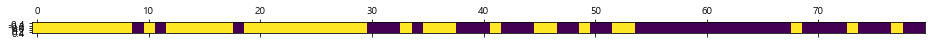

In [221]:
# 특성 선택 시각화하기
mask = select.get_support() # ture, false로 출력된다.
plt.matshow(mask.reshape(1,-1))

###################
# 밑의 그림을 통해 어떤 특성들이 선택되고 선택되지 않았는지 확인할 수 있다.

* 모델 기반 선택
* 결정트리를 기반으로 한 모델은 특성의 중요도를 확인할 수 있는데, 이를 특성을 선택하는 전처리 단계로 사용할 수 있다.

In [228]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 위에서 다룬 cancer 데이터의 노이즈 데이터를 이용한다.

# 객체 생성 및 학습하기
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train,y_train)

# 특성 선택하기
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)

# # 로지스틱 회귀 모델 사용 및 테스트 점수 확인하기
def get_score(x1,x2):
    
    # 모델 생성 및 학습
    lr = LogisticRegression(solver='lbfgs',max_iter=10000)
    lr.fit(x1,y_train)
    
    # 평가 점수 확인하기
    print('테스트 점수 : {:.3f}'.format(lr.score(x2,y_test)))
    
# 결과 확인하기
get_score(X_train,X_test) # 특성 선택 전 점수
get_score(X_train_select,X_test_select) # 특성 선택 후 점수

#############################################
# 결과를 확인해보니 특성을 선택하는 방법은 모델 성능에 영향을 미치지 않는 것을 알 수 있다.

노이즈 추가 후 테스트 점수 : 0.958
특성 추출 후 테스트 점수 : 0.958


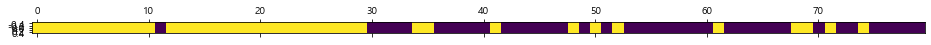

In [229]:
# 특성 선택 시각화하기
mask = select.get_support() # ture, false로 출력된다.
plt.matshow(mask.reshape(1,-1))

####################
# 밑의 결과를 통해 어떤 특성이 선택되었는지 알 수 있다.
# 위의 일변량 통계 방법보다는 특성을 좀 더 잘 찾았음을 알 수 있다.

# 반복적 특성 선택

* 특성을 하나씩 추가해 나가면서 특성을 추가하는 방법이 있고, 특성 전체에서 하나씩 제거해 나가는 방법이 있다.
* 단, 계산의 비용이 많다는 단점이 있다.

In [231]:
from sklearn.feature_selection import RFE

# 객체 생성 및 학습 --> 특성이 40개가 될때까지 반복한다.
select = RFE( RandomForestClassifier(n_estimators=100,random_state=42), n_features_to_select=40) 
select.fit(X_train,y_train)

# 특성 선택하기
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)

# 로지스틱 회귀 모델 사용하기
lr = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train,y_train)
lr_select = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train_select,y_train)

rf = RandomForestClassifier(n_estimators=100,random_state=42).fit(X_train,y_train)

# 평가 점수 확인하기
print('노이즈 추가 후 테스트 점수 : {:.3f}'.format(lr.score(X_test,y_test)))
print('특성 추출 후 테스트 점수 : {:.3f}'.format(lr_select.score(X_test_select,y_test)))
print('랜덤포레스트 테스트 점수 : {:.3f}'.format(rf.score(X_test,y_test)))

######################################
# 특성 추출을 하고 난 후의 로지스틱 회귀 모형과 랜덤포레스트 모형의 평가점수가 비슷해지고 있다는 것을 알 수 있다.
# 즉, 특성 선택에 따라 회귀모델이 앙상블 모델과 비슷한 성능을 낼 수 있다는 것을 암시한다.

노이즈 추가 후 테스트 점수 : 0.958
특성 추출 후 테스트 점수 : 0.965
랜덤포레스트 테스트 점수 : 0.972


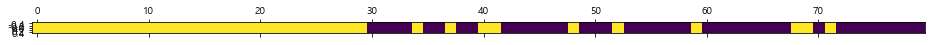

In [232]:
# 특성 선택 시각화하기
mask = select.get_support() # ture, false로 출력된다.
plt.matshow(mask.reshape(1,-1))

####################
# 밑의 결과를 통해 어떤 특성이 선택되었는지 알 수 있다.
# 원본 특성에서 하나의 특성만 빼고 정확히 선택된 것을 알 수 있다.

# 전문가 지식 활용

* 전문가 지식을 이용해 유용한 특성을 고를수 있다.

* 2015년 8월 자전거 대여에 관한 데이터를 이용해 데이터 분석해보기

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


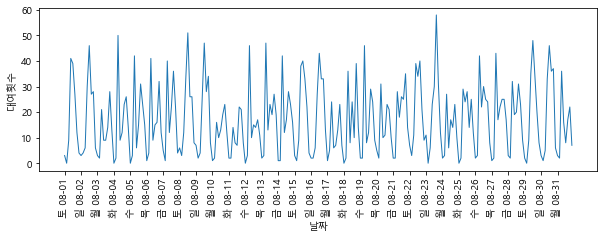

In [248]:
# 데이터 불러오기
bike = mglearn.datasets.load_citibike()

# 데이터 확인하기
print(bike.head())

# 데이터 시각화하기
plt.figure(figsize=(10,3))
xticks = pd.date_range(start = bike.index.min(),end = bike.index.max(),freq='D') # x좌표의 범위를 지정하고, '일'단위로 정한다.
week = ['일','월','화','수','목','금','토'] # 요일 지정
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))] # x축의 이름 설정

plt.xticks(xticks, xticks_name, rotation = 90)
plt.plot(bike, linewidth = 1) # 시간별 그래프 그리기
plt.xlabel('날짜')
plt.ylabel('대여횟수')
plt.show()

#########################
# 3시간 단위로 자전거 대여량을 보여주고 있다.
# time.strftime 함수를 사용하여 원하는 날짜/시간 포맷으로 출력할 수 있습니다.
# %w는 월요일을 한 주의 시작으로 두고 주차를 출력한다.

# 그래프를 확인하면 각 요일마다 어떤 시간대에 대여량이 많은지 확인할 수 있다.
# 또한 주말에 대여량이 보통 많다는 사실도 확인할 수 있다.

테스트 점수 : -0.035


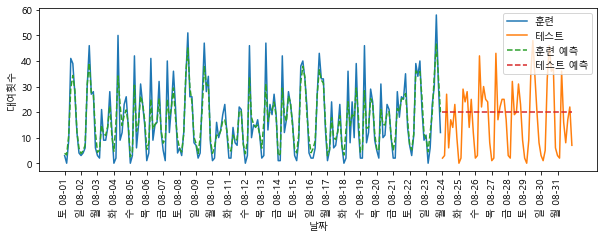

In [265]:
# 시계열 데이터 훈련시키기

# target값 추출
y = bike.values
# 특성값 추출
X = bike.index.astype('int64').values.reshape(-1,1) # 날짜와 시간을 posix 시간으로 변경

# 시계열 데이터이기 때문에 train_test_split를 통해 무작위로 훈련데이터와 테스트데이터를 나눌수 없다.
# 따라서 시간의 흐름에 따라 처음부터 184개는 훈련 데이터로 사용하고 나머지는 테스트데이터로 사용한다.

n_train = 184 # 훈련 데이터 개수 설정

# 데이터를 학습시키고 평가하는 함수 만들기
def get_fit_eval(features,target,model):
    
    # 훈련 데이터 테스트 데이터 나누기
    X_train,X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    
    # 모델 학습
    model.fit(X_train,y_train)
    
    # 예측값 출력
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # r^2 출력하기
    print('테스트 점수 : {:.3f}'.format(model.score(X_test,y_test)))
    
    # 시각화 하기
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8),xticks_name, rotation=90) # 범위가 8당 하나의 값으로 지정
    plt.plot(range(n_train),y_train,label = '훈련') # 훈련 데이터 시각화
    plt.plot(range(n_train,len(y_test) + n_train),y_test,'-',label='테스트') # 테스트 데이터 시각화
    plt.plot(range(n_train),y_pred_train,'--',label='훈련 예측')  # 훈련 예측 데이터 시각화
    plt.plot(range(n_train,len(y_test) + n_train),y_pred,'--',label='테스트 예측') # 테스트 예측 데이터 시각화
    plt.legend()
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')
    
# 함수결과 확인해보기 --> random forest 이용
model = RandomForestRegressor(n_estimators=100, random_state=0)
get_fit_eval(X,y,model)

#######################
# 그래프 결과를 확인해보면 훈련데이터에 대해서는 잘 예측하지만 테스트 데이터에 대해서는 잘 예측하지 못하는 것을 확인할 수 있다.
# 랜덤포레스트는 훈련 데이터의 범위 밖의 포인트는 예측할 수 없어 훈련 데이터의 가장 마지막 포인트를 에측값으로 활용하게 된다.
# 이를 해결하기 위해 시간과 요일이라는 두가지 특성을 사용하여 학습한다.

테스트 점수 : 0.600


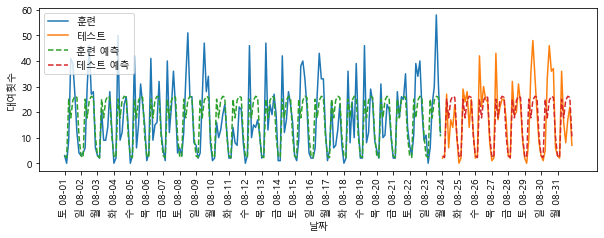

In [266]:
# 시간 특성만 활용

# 시간 특성 추가
X_hour = bike.index.hour.values.reshape(-1,1) # 데이터에서 시간만 추출

# 앞에서 만든 함수 사용 --> random forest는 그대로 사용한다.
get_fit_eval(X_hour,y,model)

##################
# 결과를 확인해보면 예측값들이 일정한 폭으로 반복되고 있고, 확 치솟는 부분을 반영하고 있지 못함을 볼 수 있다.
# 시간 특성 뿐만 아니라 요일 특성도 추가해보면 더 나아질 것 같다.

테스트 점수 : 0.842


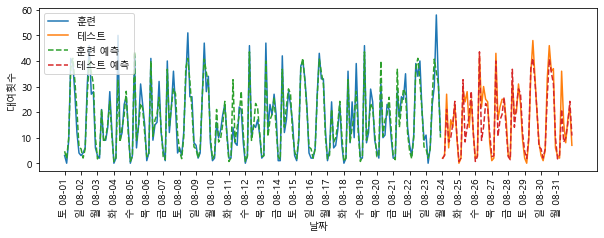

In [267]:
# 시간 특성과 요일 특성을 추가한다.
X_hour_week = np.hstack([bike.index.dayofweek.values.reshape(-1,1),bike.index.hour.values.reshape(-1,1)])

# 위에서 만든 함수 사용하기
get_fit_eval(X_hour_week,y,model)

###############
# 결과를 확인해보면 시간 특성만 적용했을 때와는 다르게 치솟은 특징들도 잘 잡아내고 있는것을 확인할 수 있다.

* 선형회귀 모델 적용하기

테스트 점수 : 0.132


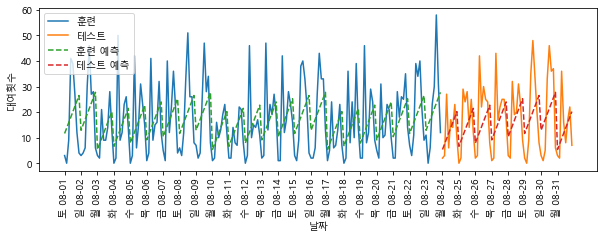

In [269]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
get_fit_eval(X_hour_week, y, model)

###########################################
# 요일과 시간을 범주형 특성으로 생각해야 될 것 같다.
# 연속형 특성으로 모델에 적용시키게 되면 평균값으로 일정하게 학습된다.

테스트 점수 : 0.619


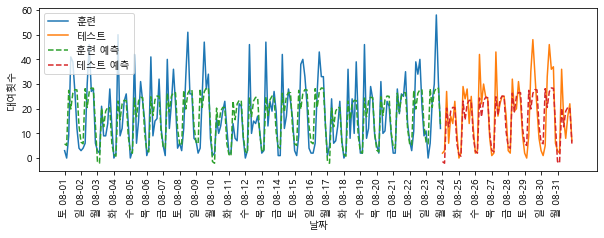

In [274]:
# 범주형 특성으로 변환하기
enc = OneHotEncoder(categories='auto')

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

# ridge 모델 사용하기
model = Ridge()
get_fit_eval(X_hour_week_onehot, y, model)

#######################
# 연속형 특성이였을 때보다는 더 좋은 성능을 보이고 있다.
# 특성의 개수를 좀 더 추가하면 더 좋은 성능을 낼 수 있을 것이라 판단된다.

테스트 점수 : 0.845


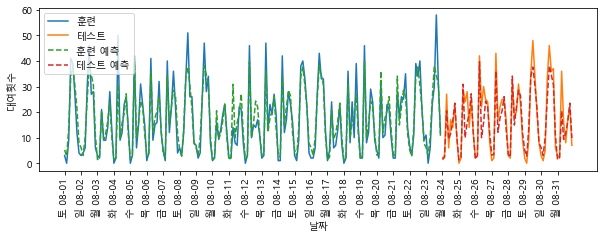

In [275]:
# 상호작용 특성을 사용하여 특성을 추가하기

# 객체 생성
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)

# 데이터 변환
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

model = Ridge()
get_fit_eval(X_hour_week_onehot_poly, y, model)

##############################
# 상호작용 특성을 활용했을 떄는 랜덤포레스트의 결과와 거의 비슷해진 것을 확인할 수 있다.
# 또한, 어떤것이 학습되었는지 확인할 수 있다는 장점이 있다.

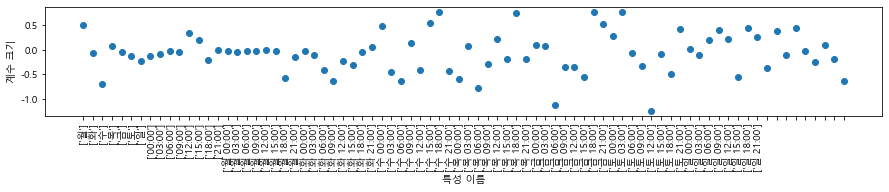

In [286]:
# 모델이 학습한 계수를 그래프로 그리기

# 시간과 요일 설정하기
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

# 계수값 찾기
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly).reshape(-1,1)[model.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

# 시각화 하기
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")
plt.show() 

#########################
# 각 요일마다의 계수의 크기를 확인할 수 있게 된다.
# 12시 정도에 계수의 크기가 커진다는 것을 확인할 수 있다.

# 모델 평가

* 새로운 데이터에 잘 일반화되는지 확인하기 위해 교차 검증을 사용한다.

교차 검증은 데이터를 여러번 반복해서 나누어서 모델을 학습한다.

k-fold 교차검증이 있는데, k개의 구간으로 나누고 한 구간을 테스트 데이터,나머지 구간을 훈련데이터로 지정하여 계속 반복한다.
결과적으로 k개의 정확도를 구할 수 있게 되고, 평균을 이용해 일반화 성능 평가를 할 수 있게 된다.

In [297]:
# iris 데이터를 이용해서 교차검증 하기
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# 데이터 생성
iris = load_iris()

# 모델 생성
lr = LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=1000)

# 교차검증하기
scores = cross_val_score(lr,iris.data,iris.target,cv=3)
scores1= cross_val_score(lr,iris.data,iris.target,cv=5)
scores2= cross_val_score(lr,iris.data,iris.target,cv=10)
print('3겹 교차 검증 점수 : ',scores)
print('5겹 교차 검증 점수 : ',scores1)
print('10겹 교차 검증 점수 : ',scores2)

############################
# 교차 검정의 경우 train_test_split과는 다르게 공평하게 훈련 데이터와 테스트데이터를 평가할 수 있다.
# 교차 검증은 데이터의 최선과 최악의 평가 점수를 모두 출력할 수 있다.
# 단, 여러번 반복해야 되기 때문에 연산 비용이 증가한다는 단점이 존재한다.

# 뷴류의 경우에는 일반적인 교차검증을 하게 되면 한쪽의 클래스들만 훈련이 되는 문제점이 발생할 수 있다.
# 따라서 각 클래스의 비율을 고려해주는 계층별 k겹 교차검증을 이용하는것이 좋다.

3겹 교차 검증 점수 :  [0.98039216 0.94117647 1.        ]
5겹 교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]
10겹 교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [298]:
# kfold를 이용해 더 세밀하게 데이터를 분할할 수 있다.
from sklearn.model_selection import KFold

# 객체 생성
kfold = KFold(n_splits=3)

# 교차검증 점수
print('3겹 교차 검증 점수 : \n',cross_val_score(lr,iris.data,iris.target,cv=kfold))

#################
# 결과를 확인해보면 각 클래스들은 순서대로 저장되어 있기 때문에 그냥 3분할로 나눠서 검정을 하게 되면 정확도가 0이 나오게 된다.
# 따라서 kfold객체에서 분할할때 무작위로 뽑을 수 있는 옵션을 지정하여야 한다.

3겹 교차 검증 점수 : 
 [0. 0. 0.]


In [300]:
# shuffle=Ture로 지정

# 데이터를 섞어서 뽑을 수 있게 만든다.
kfold = KFold(n_splits=3,shuffle=True,random_state=0)

# 교차검증 점수
print('3겹 교차 검증 점수 : \n',cross_val_score(lr,iris.data,iris.target,cv=kfold))

##############################
# 결과를 확인해보면 데이터를 섞어서 뽑았을 때는 정확도가 앞에서와는 다르게 높게 나온것을 확인할 수 있다.
# 계층별 교차검증과 비슷한 방법이라고 생각하면 될 것 같다.

3겹 교차 검증 점수 : 
 [0.98 0.96 0.96]


* LOOCV

* kfold는 k개의 폴드로 나누고 한 폴드를 테스트 데이터로 설정한다.
* 하지만 LOOCV는 하나의 데이터 포인트를 테스트 데이터로 설정한다.
* 작은 데이터셋에서는 좋은 결과를 만들어 낼 수도 있다.

In [301]:
from sklearn.model_selection import LeaveOneOut

# 객체 생성
loo = LeaveOneOut()

# 교차 검증
scores = cross_val_score(lr,iris.data,iris.target,cv=loo)

print('교차 검증 분할 횟수 :',len(scores))
print('교차 검증 평균 정확도 : {:.3f}'.format(scores.mean()))

##########################
# 하나의 데이터 포인트를 테스트 데이터로 두고 반복하기 때문에 전체 데이터포인트 개수인 150번을 반복하게 된다.
# 단, 연산처리 시간이 길어지게 된다.

교차 검증 분할 횟수 : 150
교차 검증 평균 정확도 : 0.967


* 임의 분할 교차 검증

* 임의 분할 교차검증은 폴드를 공평하게 나누는것이 아니라 훈련 데이터 크기와 테스트 데이터 크기를 직접 정할 수 있다.

In [303]:
from sklearn.model_selection import ShuffleSplit

# 객체 생성
shuffle = ShuffleSplit(test_size=0.5,train_size=0.5,n_splits=10)

# 교차검증 실시
scores = cross_val_score(lr,iris.data,iris.target,cv=shuffle)

print('교차 검증 점수 : \n',scores)
print('교차 검증 평균 점수 : {:.3f}'.format(scores.mean()))

#############################
# 이 교차검증 방법은 모든 데이터를 훈련데이터와 테스트 데이터로 사용하지 않고 일부만 사용할 수 있다.
# 위와 같은 경우는 훈련 데이터와 테스트 데이터의 비율을 각각 50%씩 지정하고 그 과정을 10번 반복한 것이다.

교차 검증 점수 : 
 [0.96       0.97333333 0.97333333 0.97333333 0.96       0.93333333
 0.97333333 0.96       0.92       0.98666667]
교차 검증 평균 점수 : 0.961


* 그룹별 교차 검증

* 그룹별 교차 검증을 이용해 훈련 데이터와 테스트 데이터를 분할할때 분리되지 않아야 할 그룹을 지정할 수 있다.
* 예를 들어 이미지 데이터의 경우 새로운 데이터에 관해서 잘 분류하는지를 판별해야 하는데 이 때 분할할 때 서로 다른 이미지들이 들어가야한다.
* 따라서 분할할 때 서로 다른 이미지가 분할되게 하기 위해 그룹별 교차 검증을 사용한다.

교차 검증 점수 : 
 [0.75       0.6        0.66666667]
교차 검증 평균 점수 : 0.672


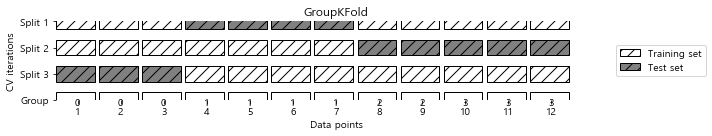

In [305]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 데이터 생성
X,y = make_blobs(n_samples=12, random_state=0)

# 각 데이터 포인트가 어떤 그룹에 속하는지 설정
groups = [0,0,0,1,1,1,1,2,2,3,3,3]

# 교차검증 수행
scores = cross_val_score(lr,X,y,groups,cv=GroupKFold(n_splits=3))

print('교차 검증 점수 : \n',scores)
print('교차 검증 평균 점수 : {:.3f}'.format(scores.mean()))

mglearn.plots.plot_group_kfold()

###################
# 그림에서 확인할 수 있듯이 그룹별 교차 검증은 그룹끼리 묶어서 훈련 데이터와 테스트 데이터로 분할할 수 있다.

# Grid search

* 일반화 성능을 향상시키기 위해 그리드서치 방법을 이용해 매개변수를 튜닝할 수 있다.

In [306]:
# iris data를 이용해 그리드 서치 해보기 --> svc이용
from sklearn.svm import SVC

# 데이터 분할하기
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

best_score = 0 # 초기화

# gamma와 C 매개변수 그리드 서치를 사용해 모든 조합 결과 확인하기
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # 모델 생성 및 학습
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # 결과 저장
        score = svm.score(X_test, y_test)
        
        # 점수가 더 높으면 변경
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.3f}".format(best_score))
print("최적 파라미터:", best_parameters)

###################
# 위의 그리드 서치를 통해 가장 높은 정확도를 보여줄때의 매개변수는 C : 100, gamma : 0.001이라는 것을 확인할 수 있다.

최고 점수: 0.974
최적 파라미터: {'C': 100, 'gamma': 0.001}


* 보통 데이터를 훈련시키고 새로운 데이터에 적용시킬 때 세가지 단계를 거친다.
* 1. 훈련 데이터로는 모델을 만든다.
* 2. 검증 데이터로는 모델의 매개변수를 선택한다.
* 3. 테스트 데이터로는 2번에서 확인한 매개변수를 적용한 모델의 성능을 평가한다.

In [308]:
# 데이터를 훈련+검증 데이터 그리고 테스트 데이터로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 데이터를 훈련 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

# 초기화
best_score = 0

# 그리드 서치 적용 --> 매개변수 설정
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # 모델 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # 평가 점수 저장
        score = svm.score(X_valid, y_valid)
        
        # 점수가 더 높으면 변경 후 저장
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 위에서 구한 파라미터를 적용하여 테스트 데이터 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수: {:.3f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.3f}".format(test_score))

######################
# 위에서 검증 데이터를 활용하지 않았을 때는 0.974였지만,검증 데이터를 이용했을 때에는 새로운 데이터 대해서 0.964의 정확도를 보여주는 것을 확인할 수 있다.

검증 세트에서 최고 점수: 0.964
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.921


In [309]:
# 조금 더 일반화된 평가 점수를 확인하려면 교차 검증을 사용해도 된다.

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # 모델 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # 평가 점수 저장
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        # 점수가 더 높으면 변경 후 저장
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 위에서 구한 파라미터를 적용하여 테스트 데이터 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수: {:.3f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.3f}".format(test_score))

검증 세트에서 최고 점수: 0.973
최적 파라미터:  {'C': 100, 'gamma': 0.01}
최적 파라미터에서 테스트 세트 점수: 0.974


* 위에서 수행한 교차 검증을 사용한 그리드 서치를 지원해주는 라이브러리를 사용해 결과를 확인해보자

In [315]:
from sklearn.model_selection import GridSearchCV

# 파라미터 지정
param_grid = {'C':[0.001, 0.01, 0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}

# 객체 설정
grid = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=False)

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

# grid searchcv 학습
grid.fit(X_train, y_train)

# 결과 출력하기
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적 매개변수:", grid.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최고 성능 모델:\n", grid.best_estimator_)

##########################
# gridsearchcv는 테스트 데이터를 사용하지 않고 최적의 파라미터를 찾아 준다.
# 앞에서는 각각의 단계를 직접 조정했지만 GridSearchCV 라이브러리를 사용하면 그 과정을 한번에 해결해준다.

테스트 세트 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [318]:
# 그리드 서치 결과를 저장
results = pd.DataFrame(grid.cv_results_)

#  일부만 출력
np.transpose(results.head())

###########################
# 걸린 시간과 파라미터 설정, 점수등을 한눈에 알아볼 수 있다.
# cv_results_ 옵션에 그리드 서치 결과가 저장되어 있다.

,0,1,2,3,4
mean_fit_time,0.00100694,0.000797796,0.000991774,0.000797749,0.000797844
std_fit_time,1.4149e-05,0.000398898,7.36463e-06,0.000398874,0.000398927
mean_score_time,0.000787592,0.000199413,0.000394201,0.000198507,0.000398874
std_score_time,0.000394003,0.000398827,0.000483143,0.000397015,0.000488519
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


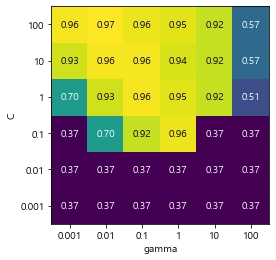

In [320]:
# 매개변수 C, gamma에 따른 그리드 서치 교차검증 결과를 히트맵으로 그려보자

# 교차검증의 평균점수를 6*6배열로 저장한다.
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],ylabel='C', yticklabels=param_grid['C'])
plt.show() 

##########################
# 히트맵을 확인해보면 C가 0.1이고, gamma가 1일때 정확도가 0.96으로 가장 높은 점수를 보이고 있다.
# 그리드서치의 경우는 매개변수의 값을 직접 정해주어야 하기 때문에 적절한 범위를 설정하지 않으면 잘못된 평가를 할 수도 있게 된다.

* 조선부 매개변수 조합을 적용하기 위한 방법

In [323]:
# svc 모델의 kernel 옵션에 따른 매개변수의 조합 설정하기
param_grid = [
    {'kernel':['rbf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]},
    {'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}
]

# 위의 조합을 gridsearchcv에 적용하기

# 객체 생성
grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=True)
grid_search.fit(X_train,y_train)

# 검증 결과 확인하기
print('최적 파라미터 : ',grid_search.best_params_)
print('가장 높은 교차 검증 점수 : {:.3f}'.format(grid_search.best_score_))

#####################
# svc 의 경우는 kenrel의 종류에 따라 사용하는 파라미터의 종류가 다른데 이 상황을 매개변수의 비대칭이라고 한다.
# 파라미터를 설정할 때 각 조건에 맞는 파라미터를 사용할 수 있다.
# 결과를 확인해보면 kernel이 rbf 이고 C: 100, gamma : 0.01 일때 정확도가 0.973으로 가장 높게 나오는 것을 알 수 있다.

최적 파라미터 :  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
가장 높은 교차 검증 점수 : 0.973


* 중첩 교차 검증

gridsearchcv를 사용할 때에는 테스트 데이터를 사용하지 않고 훈련데이터만 가지고 교차검증을 실시한다.

하지만, 훈련 데이터와 테스트 데이터를 한번만 분할하기 때문에 결과가 불안정할 수 있는 문제가 발생한다.

이에 테스트 데이터를 여러번 분할하여 검증할 수 있는 중첩 교차 검증이 존재한다.

중첩 교차 검증은 매개변수 설정이 아니라 테스트 점수의 목록을 만들어 준다.

하지만, 중첩 교차 검증은 미래의 데이터에 적용하기 위한 예측 모델을 찾는데에는 거의 사용되지 않는다.
특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는데 유용한 방법이다.

In [325]:
# 파라미터 지정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# 중첩 교차 검증 실시
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)

# 결과 확인하기 
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()) )

#########################
# 중첩 교차 검증을 하는 코드를 살펴보면 전체 데이터에서 훈련데이터와 테스트 데이터를 나누고 
# SVC의 모델에 대해 그리드 서치 CV를 수행하는 것을 반복하여 교차 검증을 실시한다.

# 중첩 교차 검증의 방식은 시간이 너무 오래 걸린다는 단점이 있다.

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.980


# 이진 분류의 평가 지표

* 이진 분류의 평가지표는 여러가지가 존재한다.
* 정확도, 정밀도, 재현율, f1-score, roc곡선, auc 등등 여러가지가 존재한다.

* 불균형 데이터 셋

In [330]:
# digit 데이터를 이용해 설명
from sklearn.datasets import load_digits

# 데이터 불러오기
digits = load_digits()

# target값 설정
y = (digits.target == 9) # 이진분류로 설정

# 데이터 분할하기
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

###################################################
# 1. 먼저 다수의 클래스가 존재하면 그 클래스를 예측값으로 출력하는 dummy classifier를 이용한다.
from sklearn.dummy import DummyClassifier

# 객체 생성 및 학습
dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

# 예측값 출력
dummy_pred = dummy.predict(X_test)

# 결과 출력
print("예측된 레이블의 고유값:", np.unique(dummy_pred))
print("dummy_classifier의 테스트 점수: {:.3f}".format(dummy.score(X_test, y_test)))

####################################################
# 2. 결정트리 모델 사용하기

# 모델 생성 및 학습
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# 예측값 출력
pred_tree = tree.predict(X_test)

# 결과 출력
print("결정 트리 테스트 점수: {:.3f}".format(tree.score(X_test, y_test)))

####################################################
# 3. 로지스틱 회귀 모델 사용하기

# 모델 생성 및 학습
lr = LogisticRegression(C=0.1, max_iter=1000,solver='lbfgs').fit(X_train, y_train)

# 예측값 출력
pred_lr = lr.predict(X_test)

# 결과 출력
print("로지스틱 회귀 테스트 점수: {:.3f}".format(lr.score(X_test, y_test)))

#########################################
# 결과를 확인해보면 타겟값의 데이터들이 불균형함을 가지고 있으면 단순한 예측 모델이여도 90%에 가까운 정확도를 보임을 알 수 있다.
# 이는 분류기의 성능을 평가할 때 정확도라는 평가지표만 가지고 모델의 성능을 평가하면 안된다는 것을 암시한다.
# 따라서 정확도라는 평가 지표말고 다른 평가 지표도 같이 확인해야 한다.

예측된 레이블의 고유값: [False]
dummy_classifier의 테스트 점수: 0.896
결정 트리 테스트 점수: 0.918
로지스틱 회귀 테스트 점수: 0.984


* 잘 분류되었는지 확인하기 위해 오차행렬을 사용한다.

In [334]:
from sklearn.metrics import confusion_matrix

# 오차행렬 생성하기 --> 예측값과 실제값 비교  
matrix = confusion_matrix(y_test,pred_lr)
matrix1 = confusion_matrix(y_test,pred_tree)
matrix2 = confusion_matrix(y_test,dummy_pred)

print('로지스틱 회귀 모형을 사용한 오차 행렬 : \n',matrix)
print('결정 트리 모형을 사용한 오차 행렬 : \n',matrix1)
print('더미 모형을 사용한 오차 행렬 : \n',matrix2)

##############################
# 세 모델의 정확도는 거의 비슷했지만, 오차행렬의 결과를 확읺보면 로지스틱 회귀 모형을 사용했을 때에 7개만 오분류를 한 것으로 나타난다.

로지스틱 회귀 모형을 사용한 오차 행렬 : 
 [[402   1]
 [  6  41]]
결정 트리 모형을 사용한 오차 행렬 : 
 [[390  13]
 [ 24  23]]
더미 모형을 사용한 오차 행렬 : 
 [[403   0]
 [ 47   0]]


* f1-socre

* 정밀도와 재현율을 동시에 고려하는 방법이 f1-score이다.

In [336]:
from sklearn.metrics import f1_score

# 재현율과 정밀도의 조화평균인 f1-score 출력하기
print("빈도 기반 더미 모델의 f1 score: {:.3f}".format(f1_score(y_test, dummy_pred)))
print("트리 모델의 f1 score: {:.3f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.3f}".format(f1_score(y_test, pred_lr)))

#########################
# 각 모델의 f1 socre을 확인해보면 앞의 오차행렬에서 확인했듯이 로지스틱 회귀 모델의 f1 score가 높다는 것을 확인할 수 있다.

빈도 기반 더미 모델의 f1 score: 0.000
트리 모델의 f1 score: 0.554
로지스틱 회귀 모델의 f1 score: 0.921


In [338]:
# classification_report는 정밀도, 재현율 , f1-score를 한번에 출력한다.
from sklearn.metrics import classification_report

print('더미 모델의 결과 : \n',classification_report(y_test, dummy_pred,target_names=["9 아님", "9"]))
print('더미 모델의 결과 : \n',classification_report(y_test, pred_tree,target_names=["9 아님", "9"]))
print('더미 모델의 결과 : \n',classification_report(y_test, pred_lr,target_names=["9 아님", "9"]))

############################3
# 재현율과 정밀도의 비율이 비슷해야지 가장 좋은 성능을 내는 것으로 보인다.
# 재현율이나 정밀도 중 어느 것을 더 중요하게 생각하느냐에 따라 모델 선택이 달라질 수는 있다.

더미 모델의 결과 : 
               precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

더미 모델의 결과 : 
               precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450

더미 모델의 결과 : 
               precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.9

* roc 곡선

* 진짜 양성 비율에 대한 거짓 양성의 비율의 그래프
* 왼쪽의 직각 직선에 가까울수록 좋은 성능을 보인다.

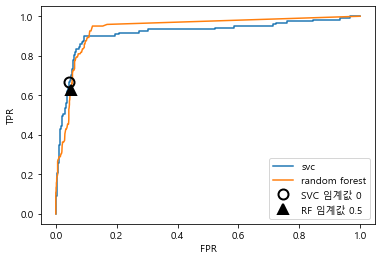

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


In [343]:
# svc와 random forest의 roc 곡선 비교하기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 데이터 생성
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

# 데이터 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 생성
svc = SVC(gamma=.05).fit(X_train, y_train)
svc.fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# svc의 fpr,tpr,threshold 구하기
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))

# random forest의 fpr,tpr,threshold 구하기
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

# 시각화 하기
plt.plot(fpr, tpr, label="svc")
plt.plot(fpr_rf, tpr_rf, label="random forest")

plt.xlabel("FPR")
plt.ylabel("TPR")

close_zero = np.argmin(np.abs(thresholds)) # 임계값 지점 표시하기
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="SVC 임계값 0", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,label="RF 임계값 0.5", c='k', mew=2)

plt.legend() # 범례 설정
plt.show() 

# auc 면적 구하기
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

########################
# 결과를 확인해보면 roc 곡선에서 랜덤 포레스트가 svc보다 왼쪽에 위치하므로 좀 더 성능이 좋다고 판단할 수 있다.
# 또한, auc 면적을 구해 성능을 평가할 수도 있다.

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


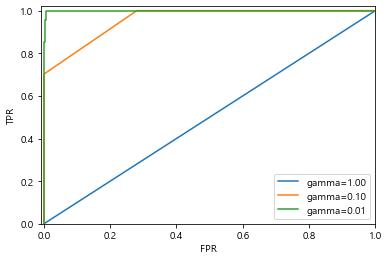

In [345]:
# svc 모델에서 gamma의 파라미터를 바꿔가면서 정확도와 auc, roc 곡선 확인해보기

# digit 데이터 사용하기

# 타깃값 지정
y = digits.target == 9

# 데이터 분할하기 
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

# gamma를 반복하면서 roc곡선 그리고, 정확도와 auc 면적 구하기
for gamma in [1, 0.1, 0.01]:
    
    # 모델 생성 및 학습
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    
    # 정확도 구하기
    accuracy = svc.score(X_test, y_test)
    
    # auc 면적 구하기
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    
    # roc 곡선 시각화 하기
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
    
plt.xlabel("FPR") # x축 이름 지정
plt.ylabel("TPR") # y축 이름 지정
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show() 

############################
# 결과를 확인해보면 gamma가 작아질수록 모델의 성능이 좋아지고 있는 것을 확인할 수 있다.
# 데이터가 불균형 할때는 auc 곡선을 사용하여 좋은 모델을 선택하고, 임계값을 조절하여 모델의 성능을 더 끌어올릴수 있다.

# 다중 분류의 평가 지표

* 다중 분류의 평가 지표로는 오차 행렬과 분류 리포트를 주로 사용한다.

In [346]:
from sklearn.metrics import accuracy_score

# 데이터 생성
digits = load_digits()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

# 로지스틱 회귀 모델 생성 및 학습
lr = LogisticRegression(solver='liblinear',multi_class='ovr') # 다중 클래스 옵션을 ovr로 지정한다.
lr.fit(X_train,y_train)

# 예측값 출력
pred = lr.predict(X_test)

# 평가 지표 출력하기
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))
print('분류 리포트 : \n',classification_report(y_test, pred))
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

####################
# 오차행렬을 확인해보면 실제가 8인데 예측을 1로 잘못 분류한것이 3개로 가장 높게 나타났다.
# f1 score를 여러가지 기준으로 구할 수 있다.
# macro는 점수에 가중치를 주지 않고, micro는 점수에 가중치를 준다.

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]
분류 리포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95

* 교차검증을 하면서 auc 평가지표를 같이 계산하는 방법

In [349]:
# 정확도, auc 구하기

# 정확도를 반영한 교차검증
scores = cross_val_score(SVC(gamma='auto'),digits.data,digits.target==9, scoring='accuracy',cv=5)
print('정확도 : ',scores)

# roc-auc를 반영한 교차검증
scores1 = cross_val_score(SVC(gamma='auto'),digits.data,digits.target==9, scoring='roc_auc',cv=5)
print('roc_auc : ',scores1)

######################
# 위와 같이 교차검증을 실시하면서 각 반복에 따른 평가지표들을 같이 출력할 수 있다.

정확도 :  [0.9        0.9        0.89972145 0.89972145 0.89972145]
roc_auc :  [0.99674211 0.99725652 0.99552804 0.99836601 0.99165807]


* gridsearchcv 를 이용해 구할수도 있다.

In [357]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# 파라미터 설정
param_grid = {'gamma':[0.0001,0.01,1,10]}

# 정확도 지표 이용
grid = GridSearchCV(SVC(), param_grid=param_grid,cv=3)
grid.fit(X_train, y_train)

print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수: {:.3f}".format(grid.best_score_))
print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, grid.predict(X_test))))


# roc_auc 지표 사용
grid1 = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision",cv=3)
grid1.fit(X_train, y_train)


print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid1.best_params_)
print("최상의 교차 검증 점수 :{:.3f}".format(grid1.best_score_))
print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, grid1.predict(X_test))))

#########################
# 사용한 평가 지표에 따라 최적의 파라미터가 다르다는 것을 확인할 수 있다.
# 따라서 주어진 데이터의 특성에 잘 맞는 평가지표를 설정하여 결과를 해석해야 될 것 같다.

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수: 0.970
테스트 세트 정확도: 0.973
평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 :0.985
테스트 세트 정확도: 0.896
